##**Case Study: New York City Airbnb Rental Market**

**Analyze the New York City Airbnb rental market to identify factors that influence rental prices and occupancy rates, and provide insights on market trends and patterns.**

### Overview
The New York City Airbnb Open Data provides detailed information about Airbnb listings in New York City. The dataset, `listings.csv`, includes a wide range of variables such as listing ID, neighborhood, room type, price, minimum nights, number of reviews, last review date, review scores, availability, and host details.

### Objectives
1. **Descriptive Analysis**:
   - Summarize the data to understand the distribution of listings across different neighborhoods.
   - Analyze the types of rooms available (entire home/apt, private room, shared room).

2. **Price Analysis**:
   - Identify the key factors that influence rental prices.
   - Explore how prices vary by neighborhood, room type, and other attributes.

3. **Occupancy Rates**:
   - Determine the factors that influence occupancy rates and availability.
   - Analyze the relationship between price, location, and occupancy rates.

4. **Market Trends**:
   - Identify trends in the Airbnb market over time, such as changes in the number of listings, average prices, and occupancy rates.
   - Explore seasonal patterns and their impact on pricing and availability.

5. **Host Analysis**:
   - Analyze the distribution of listings among hosts to understand the prevalence of multi-listing hosts.
   - Examine the impact of host attributes (e.g., response rate, reviews) on listing performance.

This analysis will provide valuable insights into the New York City Airbnb market, helping hosts optimize their listings and providing a comprehensive understanding of the factors influencing rental prices and occupancy rates.

In [12]:
import pandas as pd

nyc_rental_listing = pd.read_csv('listings.csv')

In [13]:
nyc_rental_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,NaN,30,49,2022-06-21,0.28,3,300,0,NaN
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.04,2,365,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,65.0,30,247,2024-03-06,1.38,1,212,2,NaN


In [14]:
#Display information about the dataset
nyc_rental_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37765 non-null  int64  
 1   name                            37763 non-null  object 
 2   host_id                         37765 non-null  int64  
 3   host_name                       37760 non-null  object 
 4   neighbourhood_group             37765 non-null  object 
 5   neighbourhood                   37765 non-null  object 
 6   latitude                        37765 non-null  float64
 7   longitude                       37765 non-null  float64
 8   room_type                       37765 non-null  object 
 9   price                           23044 non-null  float64
 10  minimum_nights                  37765 non-null  int64  
 11  number_of_reviews               37765 non-null  int64  
 12  last_review                     

In [15]:
# Display summary statistics
nyc_rental_listing.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.776500e+04,3.776500e+04,37765.000000,37765.000000,23044.000000,37765.000000,37765.000000,26014.000000,37765.000000,37765.000000,37765.000000
mean,3.653038e+17,1.659684e+08,40.729075,-73.947084,221.074900,29.164597,24.898981,0.905544,53.763035,152.411598,3.993168
std,4.539908e+17,1.800529e+08,0.056343,0.054458,766.620992,30.202538,58.802122,1.860784,161.979723,142.797333,15.762591
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.055254e+07,1.662776e+07,40.688800,-73.983220,86.000000,30.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,4.826382e+07,8.218953e+07,40.726440,-73.954540,150.000000,30.000000,3.000000,0.320000,2.000000,126.000000,0.000000
75%,8.276380e+17,3.031569e+08,40.762470,-73.928022,250.000000,30.000000,21.000000,1.130000,8.000000,301.000000,3.000000
max,1.193086e+18,5.869174e+08,40.911390,-73.713650,100000.000000,1250.000000,1915.000000,103.530000,842.000000,365.000000,1568.000000


### Data Cleaning and Preparation
1. **Handling Missing Values**:
   - Identify and handle missing values in critical columns such as price, reviews, and availability.
   - Decide on appropriate imputation methods or removal of rows with excessive missing data.

In [16]:
#Let's start by checking for missing values
missing_values = nyc_rental_listing.isnull().sum()
print(missing_values[missing_values > 0])


name                     2
host_name                5
price                14721
last_review          11751
reviews_per_month    11751
license              32594
dtype: int64


In [17]:
# Handle missing values (example: fill with median or mode, or drop rows)

nyc_rental_listing['name'].fillna('Unknown', inplace=True)
nyc_rental_listing['host_name'].fillna('Unknown', inplace=True)

# Fill missing values with median price
nyc_rental_listing['price'] = nyc_rental_listing['price'].replace('[\$,]', '', regex=True).astype(float)
median_price = nyc_rental_listing['price'].median()
nyc_rental_listing['price'].fillna(median_price, inplace=True)


nyc_rental_listing['reviews_per_month'].fillna(0, inplace=True)
nyc_rental_listing['last_review'].fillna('Unknown', inplace=True)
nyc_rental_listing['license'].fillna('No License', inplace=True)

In [18]:
#check for missing values
missing_values = nyc_rental_listing.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


2. **Dealing with Outliers**:
   - Detect and handle outliers in numerical variables like price and number of reviews.


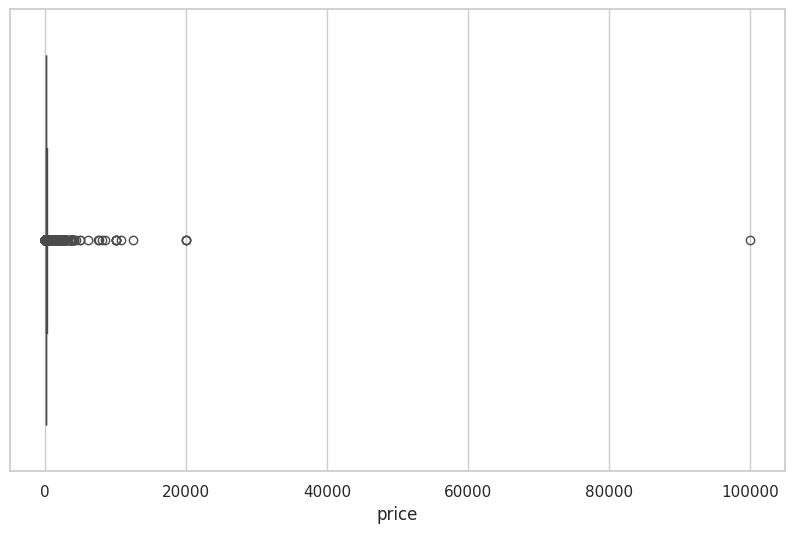

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=nyc_rental_listing['price'])
plt.show()

# Remove outliers (example: using IQR method)
Q1 = nyc_rental_listing['price'].quantile(0.25)
Q3 = nyc_rental_listing['price'].quantile(0.75)
IQR = Q3 - Q1
nyc_rental_listing = nyc_rental_listing[~((nyc_rental_listing['price'] < (Q1 - 1.5 * IQR)) | (nyc_rental_listing['price'] > (Q3 + 1.5 * IQR)))]

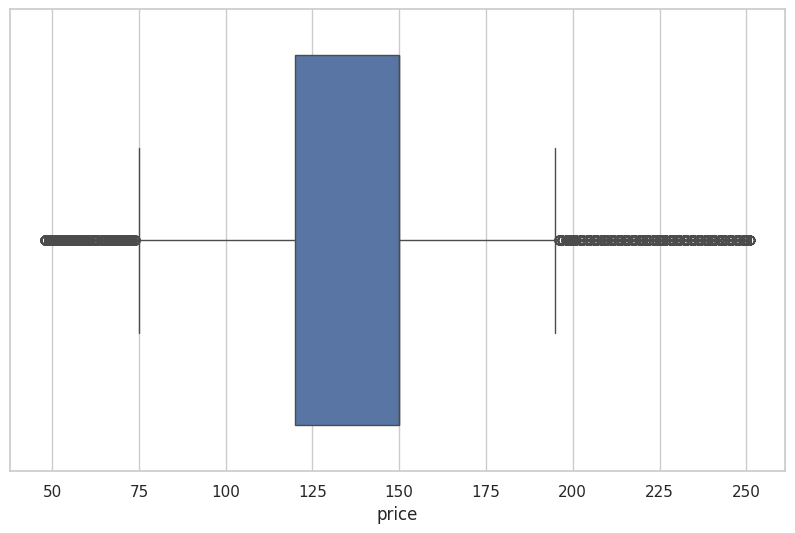

In [31]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=nyc_rental_listing['price'])
plt.show()

3. **Standardizing Formats**:
   - Ensure consistency in date formats, categorical variables, and text data.
   - Convert price data to numerical format for analysis.

In [33]:
# Convert price to numeric
nyc_rental_listing['price'] = nyc_rental_listing['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert date columns to datetime, handling non-date values
nyc_rental_listing['last_review'] = pd.to_datetime(nyc_rental_listing['last_review'], errors='coerce')

<ipython-input-33-579f991bcdb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_rental_listing['price'] = nyc_rental_listing['price'].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-33-579f991bcdb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_rental_listing['last_review'] = pd.to_datetime(nyc_rental_listing['last_review'], errors='coerce')



4. **Feature Engineering**:
   - Create new features such as price per night, review score averages, and host experience (based on host_since date).
   - Extract temporal features like month and year from date columns for trend analysis.


In [34]:
# Create price per night
nyc_rental_listing['price_per_night'] = nyc_rental_listing['price'] / nyc_rental_listing['minimum_nights']

# Extract year and month from date columns
nyc_rental_listing['last_review_year'] = nyc_rental_listing['last_review'].dt.year
nyc_rental_listing['last_review_month'] = nyc_rental_listing['last_review'].dt.month

<ipython-input-34-85f4578d0a9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_rental_listing['price_per_night'] = nyc_rental_listing['price'] / nyc_rental_listing['minimum_nights']
<ipython-input-34-85f4578d0a9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_rental_listing['last_review_year'] = nyc_rental_listing['last_review'].dt.year
<ipython-input-34-85f4578d0a9d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

We have completed the cleaning phase, now let's explore the data we cleaned.

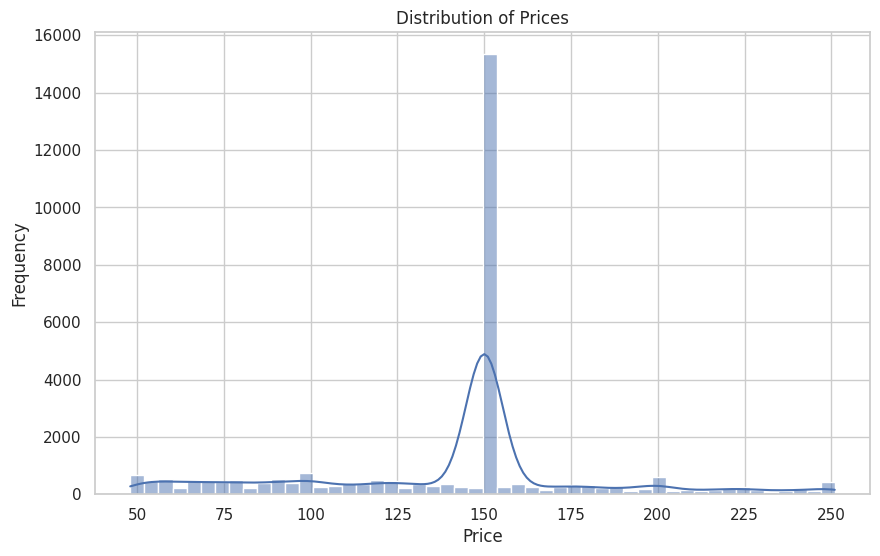

In [36]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(nyc_rental_listing['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



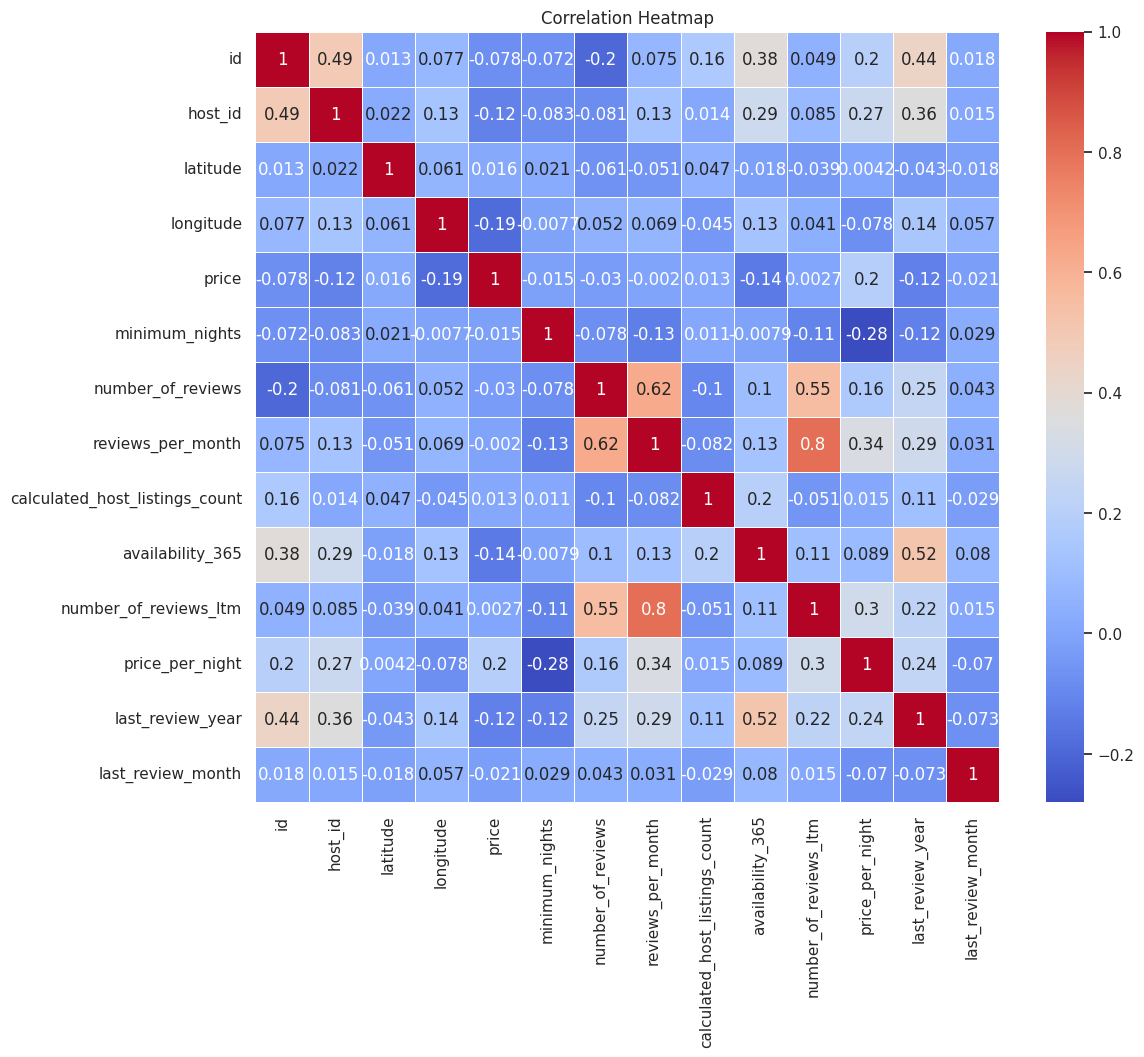

In [38]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation
numeric_columns = nyc_rental_listing.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
nyc_rental_listing.to_csv('cleaned_listings.csv', index=False)
